# 0. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Loading data

In [2]:
df = pd.read_csv("drive/My Drive/Datasets/pollution_us_2000_2016.csv")

# 2. Peek through the dataset

**About the data**: This dataset contains information on the four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide, and Ozone) for every day from 2000 to 2016 in the United States.

In [3]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
# Deleting first column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.shape

(1746661, 28)

28 columns and 1.7 milion of records.

In [ ]:
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

Two columns have missing values. However, the percentage of data missing for each of these columns is small (around 0.5%). So there is no need to fix this.

Let's look at the categorical data.

In [ ]:
df.describe(include = ['object'])

,Address,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
count,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661
unique,204,47,133,144,5996,1,1,1,1
top,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,Parts per million,Parts per billion,Parts per million
freq,35332,576142,93381,138411,640,1746661,1746661,1746661,1746661


There are 47 States, 133 Counties and 144 cities in the dataset. The NO2 Units and SO2 Units are expressed in parts per billion and O3 Units and CO Units in parts per million. 

Let's see the types of data.

In [ ]:
df.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

Date Local column is an object (string). We will change the type of this column to datetime.

In [5]:
df['Date Local']  = pd.to_datetime(df['Date Local'])

# 3. Visualizations

**a) The biggest polluters**

Text(0.1, 0.5, 'Mean value of AQI')

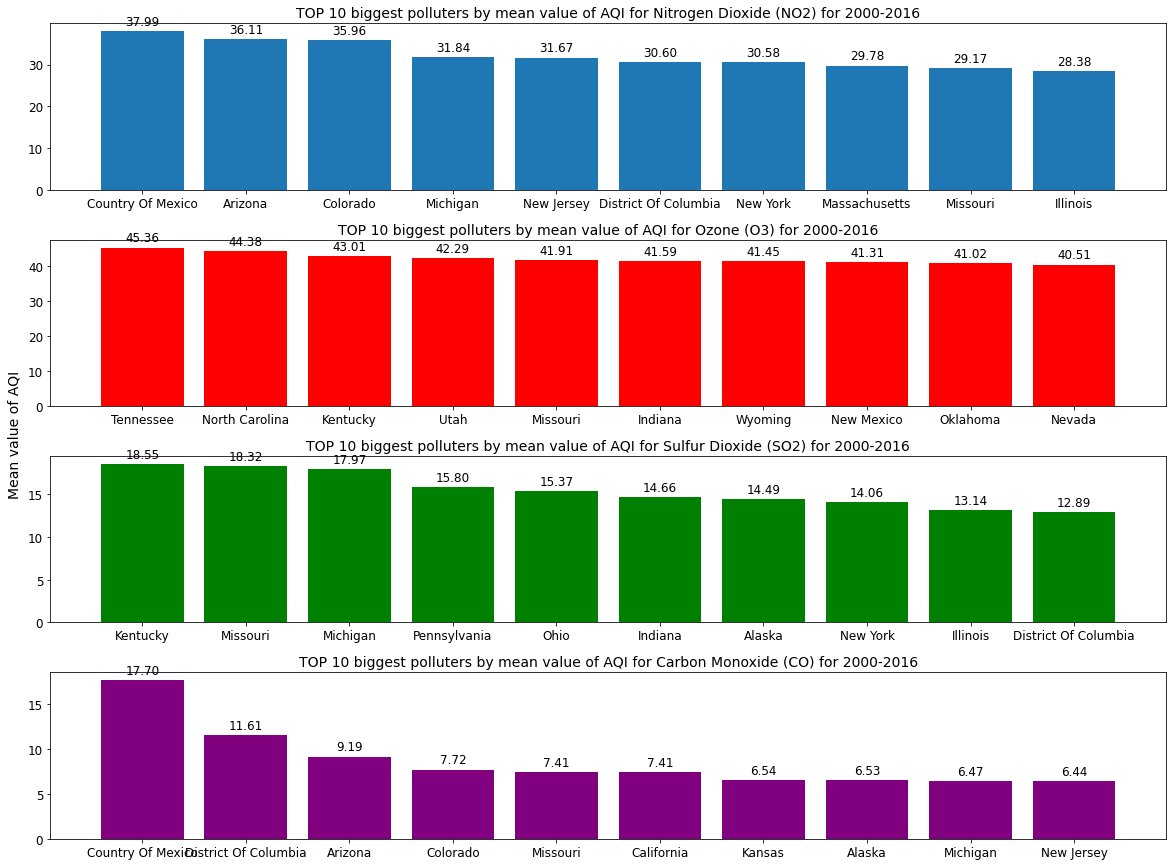

In [8]:
# TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2), Ozone (O3), Sulfur Dioxide (SO2) and Carbon Monoxide (CO) for 2000-2016

# Calculating mean value of pollutants for every State
df_AQI = df[['State', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)

# Charts size
plt.rcParams["figure.figsize"] = (20, 15) 

# Creating x variable for 10 biggest polluters
x = np.arange(10)

# Adding four charts
fig, axs = plt.subplots(4, 1)

# Plot for NO2
df_AQI_State.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2 AQI', data=df_AQI_State[:10], label = 'NO2')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[0])
plt.xticks(x, xlabels) # x axis marks

# Plot for O3
df_AQI_State.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
barplot2 = axs[1].bar(x, 'O3 AQI', data=df_AQI_State[:10], label = 'O3', color = 'red')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[1])
plt.xticks(x, xlabels) # x axis marks

# Plot for SO2
df_AQI_State.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
barplot3 = axs[2].bar(x, 'SO2 AQI', data=df_AQI_State[:10], label = 'SO2', color = 'green')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[2])
plt.xticks(x, xlabels) # x axis marks

# Plot for CO
df_AQI_State.sort_values(by = 'CO AQI', ascending = False, inplace = True)
barplot4 = axs[3].bar(x, 'CO AQI', data=df_AQI_State[:10], label = 'CO', color = 'purple')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[3])
plt.xticks(x, xlabels) # x axis marks

# change of font size on both axes
axs[0].tick_params(axis='both', which='major', labelsize=12) 
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[3].tick_params(axis='both', which='major', labelsize=12)

# Adding value for each bar
i = 0
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    global i
    for rect in rects:
        height = rect.get_height()
        axs[i].annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 12)
    i = i + 1

autolabel(barplot1)
autolabel(barplot2)
autolabel(barplot3)
autolabel(barplot4)

# Space between charts
plt.subplots_adjust(hspace=0.3) 

# Adding plot titles and axis titles
axs[0].set_title('TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2) for 2000-2016', fontsize = 14)
axs[1].set_title('TOP 10 biggest polluters by mean value of AQI for Ozone (O3) for 2000-2016', fontsize = 14)
axs[2].set_title('TOP 10 biggest polluters by mean value of AQI for Sulfur Dioxide (SO2) for 2000-2016', fontsize = 14)
axs[3].set_title('TOP 10 biggest polluters by mean value of AQI for Carbon Monoxide (CO) for 2000-2016', fontsize = 14)
fig.text(0.1, 0.5, 'Mean value of AQI', ha='center', va='center', rotation='vertical', fontsize = 14)

The highest average pollution level for the years 2000-2016 is for ozone and it is between 40.51 AQI and 45.36. Next is for NO2 (from 28.38 AQI to 37.99 AQI) and then for SO2 (from 12.89 AQI to 18.55 AQI). The lowest level is for CO and it is between 6.44 AQI to 17.70 AQI.

By the mean value of Ozone the biggest polluters are respectively Tennessee (45.36 AQI), North Carolina (44.38 AQI) and Kentucky (43.01 AQI). Kentucky is also one of the biggest polluters for SO2 (18.55 AQI). For NO2 the record holders are respectively: Country of Mexico (37.99 AQI), Arizona (36.11 AQI) and Colorado (35.96 AQI). Country of Mexico and Arizona are also one of the biggest polluters for CO (17.70 AQI and 9.19 AQI respectively).

**b) Changes in the level of pollution over time** 

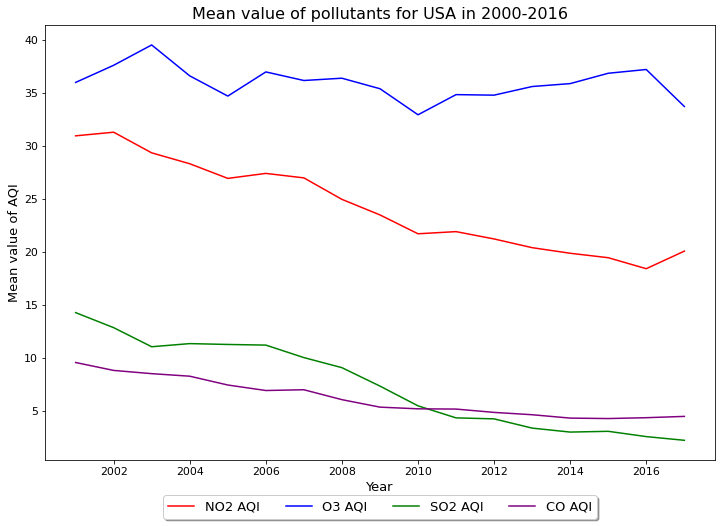

In [23]:
# Mean value of pollutants for USA in 2000-2016

# Data
df_AQI_Year = df_AQI[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].resample('Y', on = 'Date Local').mean()
df_AQI_Year.reset_index(inplace=True)

# Plot size
plt.rcParams["figure.figsize"] = (12, 8) 

# Adding plots
fig, ax = plt.subplots()
ax.plot('Date Local', 'NO2 AQI', data=df_AQI_Year, color = "red", label = "NO2 AQI")
ax.plot('Date Local', 'O3 AQI', data=df_AQI_Year, color = "blue", label = "O3 AQI")
ax.plot('Date Local', 'SO2 AQI', data=df_AQI_Year, color = "green", label = "SO2 AQI")
ax.plot('Date Local', 'CO AQI', data=df_AQI_Year, color = "purple", label = "CO AQI")

# Adding plot title and axis titles
plt.title('Mean value of pollutants for USA in 2000-2016', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of AQI", fontsize = 13)

# change of font size on both axes
ax.tick_params(axis='both', which='major', labelsize=11) 

# Adding legend
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), ncol = 6, shadow = True, fontsize = 13)

For all pollutants except ozone, AQI has decreased from 2000 to 2016. For ozone the level of AQI for 2016 is practically the same as in 2000.

**c) Choropleth maps**

We will create choropleth maps to show geographically the level of pollution over time.

In [24]:
## To use plotly choropleth maps, states names must be encoded.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

Because Country Of Mexico and District Of Columbia are not used in choropleth maps, we will delete them.

In [25]:
df = df[df['State']!='Country Of Mexico'] # deleting Mexico
df = df[df['State']!='District Of Columbia'] # deleting Columbia
df['State_abbrev'] = df.State.apply(lambda x: us_state_abbrev[x])

In [26]:
# Calculating annual mean value of pollutants for every State
df_AQI = df[['State_abbrev', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State_Year = df_AQI.groupby('State_abbrev').resample('Y', on = 'Date Local').mean()
df_AQI_State_Year.reset_index(inplace = True)
df_AQI_State_Year

,State_abbrev,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,AK,2014-12-31,21.167598,15.206704,14.000000,6.983240
1,AK,2015-12-31,18.634340,19.158983,14.764706,6.269841
2,AL,2013-12-31,21.387097,18.903226,6.580645,4.129032
3,AL,2014-12-31,21.495854,36.983416,7.956954,3.711443
4,AL,2015-12-31,20.026667,37.343333,6.950000,3.933333
...,...,...,...,...,...,...
515,WY,2012-12-31,11.709722,40.455556,3.986111,2.636111
516,WY,2013-12-31,11.206416,41.295676,0.687587,0.824022
517,WY,2014-12-31,8.973533,44.806674,0.547756,0.442396
518,WY,2015-12-31,9.368617,43.015785,1.894150,0.713755


In [27]:
# Adding column coresponding to the year of Date Local column
df_AQI_State_Year['Year'] = df_AQI_State_Year['Date Local'].dt.year
# Sorting values by Date Local (for animated choropleth presented below)
df_AQI_State_Year.sort_values(by = 'Date Local', inplace = True)

In [28]:
# Plotly choropleth showing AQI for Nitrogen Dioxide changes from 2000 to 2016
fig_NO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='NO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Nitrogen Dioxide (NO2)',
              height=600,
             )

# Modifying legend 
fig_NO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [29]:
# Plotly choropleth showing AQI for Ozone changes from 2000 to 2016
fig_O3 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='O3 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Ozone (O3)',
              height=600,
             )

# Modifying legend 
fig_O3.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [30]:
# Plotly choropleth showing AQI for Sulfur Dioxide changes from 2000 to 2016
fig_SO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='SO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Sulfur Dioxide (SO2)',
              height=600,
             )

# Modifying legend 
fig_SO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [31]:
# Plotly choropleth showing AQI for Carbon Monoxide changes from 2000 to 2016
fig_CO = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='CO AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Carbon Monoxide (CO)',
              height=600,
             )

# Modifying legend 
fig_CO.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

The annual average level of AQI for all pollutants exept ozone has never exceeded 50, which means that for NO2, SO2 and CO the air quality condidions are good (green color). For ozone AQI has been between 50 and 100 in years 2000-2006 (except 2004) and in 2012. The worst was 2002 and 2005 with 3 States above 50 AQI.

Let's look at the data for 2005 for July. It is expected that in the summer months the level of Ozone should be higher.

In [32]:
# Calculating daily mean value of pollutants for every State
df_AQI_State_Month = df_AQI.groupby('State_abbrev').resample('D', on = 'Date Local').mean()
df_AQI_State_Month.reset_index(inplace = True)

# Adding columns coresponding to the day, month and year of Date Local column
df_AQI_State_Month['Day'] = df_AQI_State_Month['Date Local'].dt.day
df_AQI_State_Month['Month'] = df_AQI_State_Month['Date Local'].dt.month
df_AQI_State_Month['Year'] = df_AQI_State_Month['Date Local'].dt.year

# Data for July in 2005
df_AQI_State_2005_July = df_AQI_State_Month[(df_AQI_State_Month['Year'] == 2005) & (df_AQI_State_Month['Month'] == 7)]

# Sorting values by Date Local (for animated choropleth presented below)
df_AQI_State_2005_July.sort_values(by = 'Date Local', inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# Plotly choropleth showing AQI for Ozone changes for July 2005
fig_O3_v2 = px.choropleth(df_AQI_State_2005_July,
              locations = 'State_abbrev',
              animation_frame="Day", # showing changes through the days
              color='O3 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per day for Ozone (O3) for July 2005',
              height=600,
             )

# Modifying legend 
fig_O3_v2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

As expected the level of AQI for Ozone has reached good air quality conditions (green color). In some cases it has exceeded 100 AQI (air quality conditions are unhealthy for sensitive groups) and even 150 AQI (air quality conditions are unhealthy).